In [1]:
import networkx as nx
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

# 4.7 

* wheter is directed ?
* n of vertices
* n of edges
* mean vertex degree
* alpha estimate from power law
* average path length
* pearson's correlation coefficient

 Let’s fill the above list with metrics od selected real networks,
use the built-in functions for counting the parameters. Compare
the results with the literature.

In [2]:
# loading networks


# separate books

t1 = pd.read_csv("gameofthrones/data/got-s1-edges.csv")
l1 = pd.read_csv("gameofthrones/data/got-s1-nodes.csv")

super_map = pd.Series(l1.Label.values,index=l1.Id).to_dict() 
t1['Source'] = t1['Source'].map(super_map)
t1['Target'] = t1['Target'].map(super_map)
G1 = nx.from_pandas_edgelist(t1, 'Source', 'Target', edge_attr='Weight')

t2 = pd.read_csv("gameofthrones/data/got-s2-edges.csv")
l2 = pd.read_csv("gameofthrones/data/got-s2-nodes.csv")

super_map = pd.Series(l2.Label.values,index=l2.Id).to_dict() 
t2['Source'] = t2['Source'].map(super_map)
t2['Target'] = t2['Target'].map(super_map)
G2 = nx.from_pandas_edgelist(t2, 'Source', 'Target', edge_attr='Weight')

t3 = pd.read_csv("gameofthrones/data/got-s3-edges.csv")
l3 = pd.read_csv("gameofthrones/data/got-s3-nodes.csv")

super_map = pd.Series(l3.Label.values,index=l3.Id).to_dict() 
t3['Source'] = t3['Source'].map(super_map)
t3['Target'] = t3['Target'].map(super_map)
G3 = nx.from_pandas_edgelist(t3, 'Source', 'Target', edge_attr='Weight')

t4 = pd.read_csv("gameofthrones/data/got-s4-edges.csv")
l4 = pd.read_csv("gameofthrones/data/got-s4-nodes.csv")

super_map = pd.Series(l4.Label.values,index=l4.Id).to_dict() 
t4['Source'] = t4['Source'].map(super_map)
t4['Target'] = t4['Target'].map(super_map)
G4 = nx.from_pandas_edgelist(t4, 'Source', 'Target', edge_attr='Weight')

# openflights



openflights = pd.read_csv("infopenflights/inf-openflights.edges", comment = "%", header = None, sep = " ").loc[:, [0,1]]
openflights.columns = ['Source', 'Target']

G5 = nx.from_pandas_edgelist(openflights, 'Source', 'Target')

# football


football_nodes = pd.read_csv("football/nodes.txt", sep = "\s", header = None).loc[:,[0,1,5,6,7]]
data = pd.read_csv("football/new_edges.csv", index_col = 0, sep = ",")
data.columns = ['Source', 'Target', 'weight']


super_map = pd.Series(football_nodes.iloc[:,1].values,index=football_nodes.iloc[:,0]).to_dict() 

data['Source'] = data['Source'].map(super_map)
data['Target'] = data['Target'].map(super_map)

G6 = nx.from_pandas_edgelist(data, 'Source', 'Target', edge_attr='weight', create_using=nx.DiGraph())





C:\Users\Patryk\AppData\Local\Temp\ipykernel_19652\303327542.py:50: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  football_nodes = pd.read_csv("football/nodes.txt", sep = "\s", header = None).loc[:,[0,1,5,6,7]]


In [3]:


def alpha_estimator_max_likelihood(x):
    x_min = min(x) # probably a biased estimator of x_min
    return(1 + len(x)/(np.log(x_min) + sum(np.log(x))))

def createTable(G : nx.graph, name='', directed=False) -> dict:
    degrees = list(dict(G.degree).values())
    print(name)
    
    if type(G) == nx.classes.digraph.DiGraph:
        if nx.is_strongly_connected(G):
            av = nx.average_shortest_path_length(G)
        else:
            av = 'not connected'
    else:
        if nx.is_connected(G):
            av = nx.average_shortest_path_length(G)
        else:
            av = 'not connected'
    
    
    
    return {
        'name': name,
        'directed': directed,
        'N' : len(G.nodes),
        'E' : len(G.edges),
        '<k>': np.mean(degrees),
        'a': alpha_estimator_max_likelihood(degrees),
        'l': av,
        'r': nx.degree_pearson_correlation_coefficient(G)
    }
ba = nx.generators.barabasi_albert_graph(1000, 10)
graphs = [{'G': G1, 'name' : 'GOT1_SERIES'},
          {'G': G2, 'name' : 'GOT2_SERIES'},
          {'G': G3, 'name' : 'GOT3_SERIES'},
          {'G': G4, 'name' : 'GOT4_SERIES'},
          {'G': G5, 'name' : 'OPENFLIGHTS'},
          {'G': G6, 'name' : 'FOOTBALL', 'directed' : True}
          ]
pd.DataFrame([createTable(**kwargs) for kwargs in graphs])



GOT1_SERIES
GOT2_SERIES
GOT3_SERIES
GOT4_SERIES
OPENFLIGHTS
FOOTBALL


,name,directed,N,E,<k>,a,l,r
0,GOT1_SERIES,False,126,549,8.714286,1.601685,2.644698,-0.117789
1,GOT2_SERIES,False,129,486,7.534884,1.633997,not connected,0.041098
2,GOT3_SERIES,False,124,504,8.129032,1.572462,3.258327,0.068947
3,GOT4_SERIES,False,172,667,7.755814,1.616991,not connected,-0.009834
4,OPENFLIGHTS,False,2939,15677,10.668255,1.722690,not connected,0.050916
5,FOOTBALL,True,35,118,6.742857,1.604810,not connected,-0.197589


# Analysis with the literature

https://networkofthrones.wordpress.com/the-series

got1 series -- 127 nodes (characters) and 550 edges 
got2 series -- 129 nodes (characters) and 486 edges 
got3 series -- 151 nodes (characters) and 570 edges
got4 series -- 172 nodes (characters) and 667 edges

other parameters not found

https://networkrepository.com/inf-openflights.php
    
2.9K nodes, 30.5K edges ( number of edges is not the same), average degree 20 ( whereas here it is 10.67), correlation coefficient not found

http://vlado.fmf.uni-lj.si/pub/networks/data/sport/football.htm

35 vertices, no other data found



# Other commentaries


**Alpha** estimators are reasonable, comparable across each network -- 1.5 to 1.7. It could be noticed that larger the average degree, the larger alpha estimator (scaling parameter of the distribution), but the influence is small and requires further investigation.

Shortest path length did not exist for unconnected graphs -- it is undefined for them.



# 4.1 Power law in the real data - case study



Excercise 1.
Import the data, draw their histogram

(array([68., 31., 10.,  5.,  6.,  2.,  2.,  1.,  0.,  1.]),
 array([ 1. ,  6.6, 12.2, 17.8, 23.4, 29. , 34.6, 40.2, 45.8, 51.4, 57. ]),
 <BarContainer object of 10 artists>)

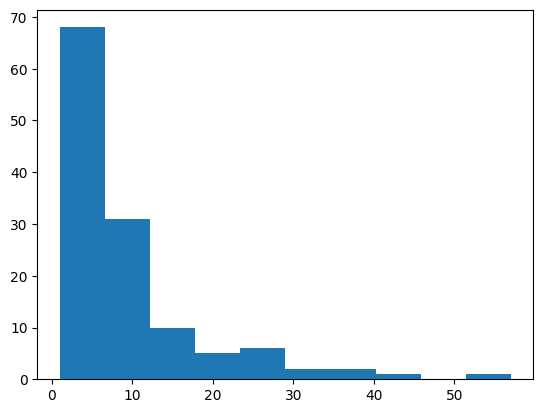

In [42]:
X = list(dict(G1.degree).values())
plt.hist(X)



Excercise 2.
Correct the scale of the plot’s axes to double logarithmic.

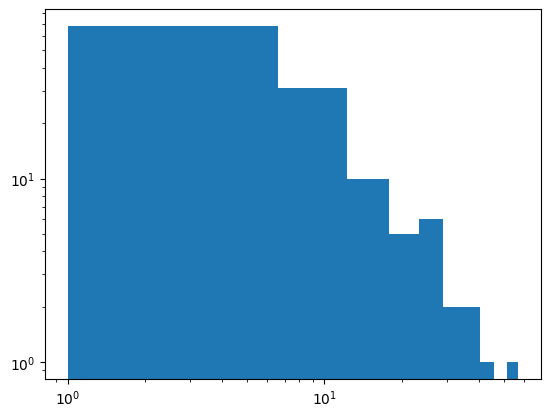

In [43]:


plt.hist(X)
plt.yscale('log')
plt.xscale('log')



Excercise 3.
Apply logarithmic binning as well.

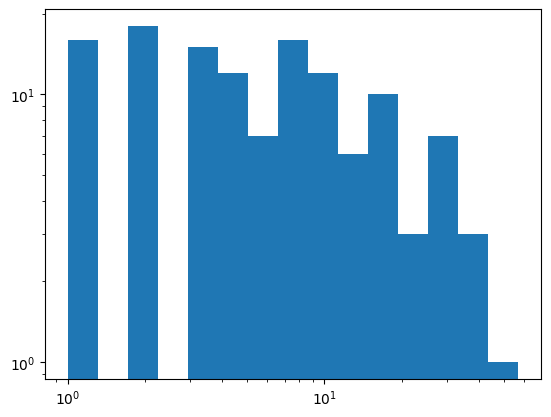

In [67]:
HIST = plt.hist(obs, bins = np.exp(np.linspace(np.log(min(X)), np.log(max(X)), 16)))
plt.yscale('log')
plt.xscale('log')

Ex.4 Compute and draw the survival function

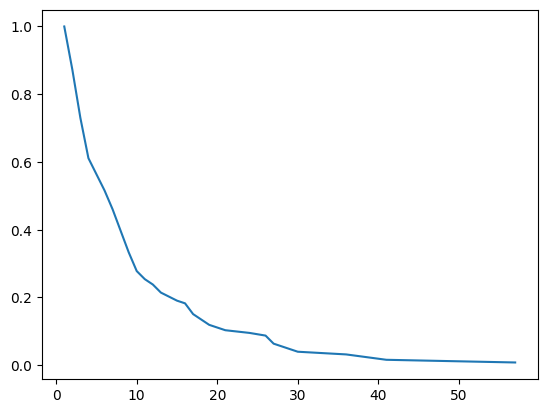

In [60]:
def survFunction(x: float, X=X) -> float:
    # cumulative distribution function
    cdf = len(list(filter(lambda v: v<x, X)))/len(X)
    return 1-cdf
x2=np.unique(obs)
y2=[survFunction(x) for x in x2]
plt.plot(x2, y2)

Excercise 5.
Which chart is the most readable? Which is most robust for the
noise?

-- the most readable is survival function chart, whereas the most robust is first histogram or survival function chart

-- the second histogram is very sensitive to the noise

Excercise 6.
Use the linear regression to the previous plots to determine the $\alpha$
parameter estimator.

In [68]:
from sklearn.linear_model import LinearRegression
log_y = HIST[0].reshape(-1,1)
log_x = np.array([(a+b)/2 for a,b in zip(HIST[1][:-1], HIST[1][1:], )]).reshape(-1,1) # mids of intervals as representative points for linear regression
model = LinearRegression(fit_intercept=True).fit(log_x, log_y)
model.coef_, model.intercept_


(array([[-0.19938646]]), array([11.17838641]))

 log(y) = $\alpha$ * log(x) + $\beta$
 
 alpha = - 0.19938646

Exercice 7

In [64]:
def alpha_estimator_max_likelihood(x):
    x_min = min(x) # probably a biased estimator of x_min
    return(1 + len(x)/(np.log(x_min) + sum(np.log(x))))

In [63]:
alpha_estimator_max_likelihood(X)

1.6016851448924934

Exercice 8

the resulting **x_min** will be larger than its actual value (because of biased estimator) so the resulting **alpha** will be smaller


# P4.1

Collect obtained scripts for power distribution analysis.

Collected.


# P4.3 

Determine the dependence of the average degree of the nearest
neighbor on the degree of the vertex for selected real or artifical
networks.

In [9]:
def average_degree(G: nx.Graph, k: int): 
    degrees = dict(G.degree)
    nodes_having_k_degree = [n for n, v in degrees.items() if v == k] # collecting nodes having k-th degree
    averages = [np.sum([degrees[i] for i in G.neighbors(node)]) / k for node in nodes_having_k_degree]
    
    return np.mean(np.array(averages))

(0.0, 40.3125)

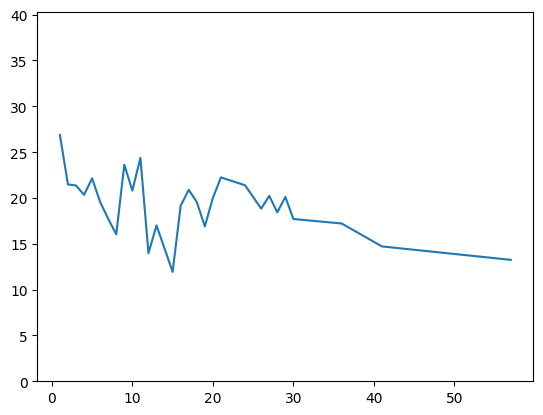

In [10]:
unique_degrees = np.unique(list(dict(G1.degree).values()))
av_degrees = [average_degree(G1, k) for k in unique_degrees]

plt.plot(unique_degrees, av_degrees)
plt.ylim(0, np.max(av_degrees)*1.5)

# P4.4 

Check how random edge switching affects the result of the
previous task. 

In [12]:

# randomly switching
n_of_edges = len(G1.edges)
G1_ = nx.algorithms.swap.double_edge_swap(G1, nswap=n_of_edges, max_tries=n_of_edges*2)



(0.0, 36.63333333333333)

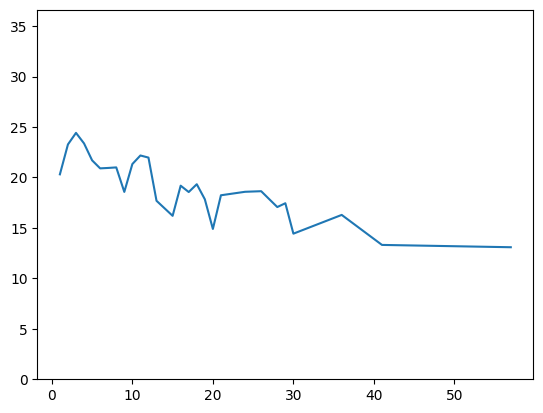

In [13]:
# plotting the same plot

unique_degrees = np.unique(list(dict(G1_.degree).values()))
av_degrees = [average_degree(G1_, k) for k in unique_degrees]

plt.plot(unique_degrees, av_degrees)
plt.ylim(0, np.max(av_degrees)*1.5)

The plots look similar.

# P4.6 

Find the correlation coefficient for the network from task
P4.3-P4..4 (before and after edge switching). 

In [17]:


print('Correlation coefficient before edge switching ' + str(nx.degree_pearson_correlation_coefficient(G1)))
print('Correlation coefficient after edge switching ' + str(nx.degree_pearson_correlation_coefficient(G1_)))


Correlation coefficient before edge switching -0.1820915657146505
Correlation coefficient after edge switching -0.1820915657146505


The coefficient did not change much.